# Regression Analysis

# Insufficient Data Preprocessing

In [1]:
# Transforming the data by removing the mean value of each feature and then scale them by dividing non-constant features by 
# their standard deviation

from sklearn import preprocessing
import numpy as np

X_train = np.array([[1.,-1.,2],[2.,0.,0.],[0.,1.,-1.]])
X_scaled = preprocessing.scale(X_train)
print(X_scaled)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [2]:
#finding the mean and variance of the data after standardization

print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[0. 0. 0.]
[1. 1. 1.]


# Simple Linear Regression Project

In [3]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [12]:
# loading the data

cars = pd.read_csv("auto-mpg.csv")

# The dataset I have included "?" for some of the horsepower values

cars = cars[cars["horsepower"] != "?"]
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Model
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [13]:
# Choose the feature and target variables

y = cars.mpg
X= cars.horsepower

X_train,X_test,y_train,y_test = train_test_split(pd.DataFrame(X),y,test_size=0.3,random_state=42)

In [14]:
# Fitting the model using SKlearn linear regression module
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
# Testing the model on the test data

import math
from sklearn.metrics import mean_squared_error
y_prediction = regressor.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print(RMSE)

4.955413560049774


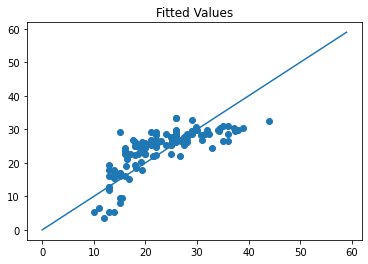

In [19]:
# Plotting the fitted slope

# actual vs predicted points

plt.scatter(y_test,regressor.predict(X_test))

straight_line = np.arange(0,60)

plt.plot(straight_line,straight_line)
plt.title("Fitted Values")
plt.show()

# Multiple Linear Regression 

In [21]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf

In [23]:
# Spliting the data into feature and target variables

y = cars.mpg

X = cars[["cylinders","displacement","horsepower","weight","acceleration","model year","origin"]]

In [24]:
# In my dataset origin was already created into a dummy variable

# This would be how to create the dummy variable X=pd.get_dummies(X,drop_first=True)

#splitting the data into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [25]:
#performing feature scaling

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_sc = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [26]:
# Training the linear regression model and testing it

regressor = LinearRegression()
regressor.fit(X_train_sc,y_train)

LinearRegression()

In [27]:
y_prediction = regressor.predict(X_test_sc)

RMSE = math.sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print(RMSE)

3.225568262554119


Text(0.5, 20.80000000000002, 'Vehicle Weight')

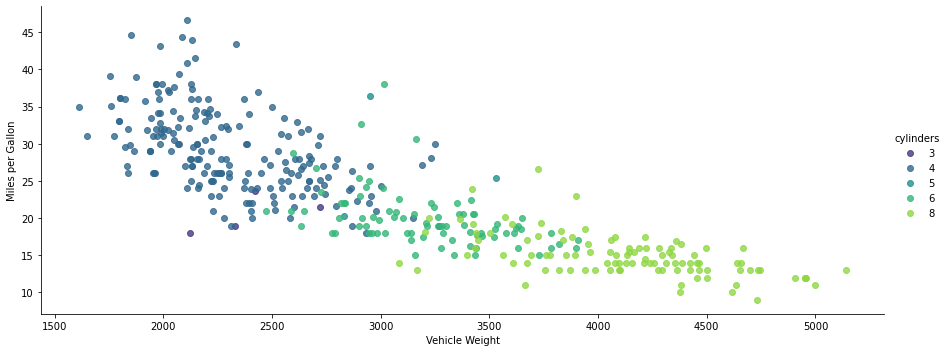

In [29]:
#modeling interaction models. The target variable is MPG and we want to know how the weight variable affects the relationship 
# between cylinders and mpg 

#plotting mpg on the y axis and weight on the x axis

sns.lmplot(x="weight",y="mpg",hue="cylinders",data=cars,fit_reg=False,palette="viridis",size=5,aspect=2.5)
plt.ylabel("Miles per Gallon")
plt.xlabel("Vehicle Weight")

In [30]:
# Building a regression model with mpg as the target and weight and cylinders as the feature variables

model = smf.ols(formula="mpg ~ weight + cylinders",data=cars).fit()
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,46.2923,0.794,58.305,0.000,44.731,47.853
weight,-0.0063,0.001,-10.922,0.000,-0.007,-0.005
cylinders,-0.7214,0.289,-2.493,0.013,-1.290,-0.152


In [32]:
# modeling the interaction between the weight variable and the cylinders variable

model_interaction = smf.ols(formula = "mpg ~ weight + cylinders + weight:cylinders",data=cars).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,65.3865,3.733,17.514,0.000,58.046,72.727
weight,-0.0128,0.001,-9.418,0.000,-0.016,-0.010
cylinders,-4.2098,0.724,-5.816,0.000,-5.633,-2.787
weight:cylinders,0.0011,0.000,5.226,0.000,0.001,0.002


In [33]:
# the second way to model interaction is by adding another variable which is the multiplication of the two variables

cars["wt_cyl"] = cars.weight * cars.cylinders

model_multiply = smf.ols(formula = "mpg ~ weight + cylinders + wt_cyl",data=cars).fit()
summary = model_multiply.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,65.3865,3.733,17.514,0.000,58.046,72.727
weight,-0.0128,0.001,-9.418,0.000,-0.016,-0.010
cylinders,-4.2098,0.724,-5.816,0.000,-5.633,-2.787
wt_cyl,0.0011,0.000,5.226,0.000,0.001,0.002


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


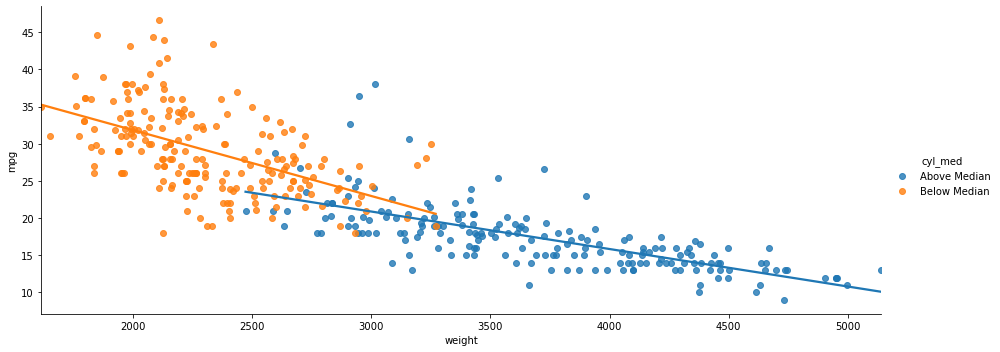

In [36]:
#plotting the interaction graph to show the interaction

cars["cyl_med"] = cars.cylinders > cars.cylinders.median()
cars["cyl_med"] = np.where(cars.cyl_med==False,"Below Median","Above Median")

sns.lmplot(x="weight",y="mpg",hue="cyl_med",data=cars,ci=None,size=5,aspect=2.5)